<a href="https://colab.research.google.com/github/tathi-martins/pos_eng_e_analise_de_dados/blob/main/Projeto_final_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aluna:**

Tathiana de Souza Martins - tsm2@cesar.school

**Descrição do Dataset:**



Um total de 73 clientes, com idade entre 24 e 81 anos, foram entrevistados. Dos clientes entrevistados, 38 eram clientes reincidentes e 35 eram novos clientes. As variáveis escolhidas são as essenciais que formam o sistema de comunicação não-verbal. Além disso, são a mais fácil de avaliar em clientes. O sistema não-verbal está composto por sub-sistemas como kinesiográfico, paralálisis, proxêmica, cronológica e outros. Na elaboração da questão do questionário, os indicadores que compõem esses sub-sistemas foram considerados para ser explorados como parte das preferências de comunicação dos clientes, assim como seriam facilmente avaliáveis em clientes. Os 22 variáveis analisadas foram consideradas facilmente avaliáveis pela clientela do hotel.


[Fonte](https://archive.ics.uci.edu/dataset/853/non+verbal+tourists+data)

**Colunas do Dataset:**

**sex:** Sexo do turista (M/F).

**age:** Idade do turista.

**country:** País de origem do turista.

returning: Indica se o turista é recorrente ou não (yes/no).

GImg1, GImg2, GImg3: Preferências visuais em relação às imagens (likes, dislikes, indiferent).

PImg1, PImg2, PImg3, PImg4, PImg5: Preferências visuais relacionadas a outras imagens (likes, dislikes, indiferent).

Tense - relaxed: Escala de estresse/relaxamento (numérico).

Authoritative - anarchic: Escala de autoridade (numérico).

Hostile - friendly: Escala de hostilidade/amigabilidade (numérico).

TAudio1, TAudio2, TAudio3: Preferências auditivas relacionadas a sons.

QAudio1, QAudio2, QAudio3: Preferências auditivas relacionadas à qualidade de sons.

Proxemics: Medida de proximidade pessoal.

Type of Client: Categoria do tipo de cliente (A, B, C, D).

###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=31fe1cd57eaf38bb0a1c407518d5665c66f194fe7e48ad4fcb91d09068d84322
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###Carregar a base de dados

Abaixo iremos carregar a base de dados "Non verbal tourists data DataSet".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv

Obs: iremos considerar a variável de saída: **Tipo/classe do cliente**

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv')

In [ ]:
df.head(10)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
5,F,31,canada,yes,likes,likes,likes,likes,likes,likes,...,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
6,M,64,canada,yes,indiferent,likes,likes,likes,likes,indiferent,...,10,2,B,dislikes,dislikes,likes,indiferent,dislikes,dislikes,1
7,M,51,argentina,yes,likes,likes,likes,likes,likes,indiferent,...,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
8,F,28,hungary,no,likes,likes,likes,likes,likes,indiferent,...,3,3,C,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
9,M,78,england,yes,likes,likes,likes,likes,likes,likes,...,3,2,A,dislikes,indiferent,likes,dislikes,likes,indiferent,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

In [ ]:
df.describe()

,age,Tense - relaxed,Hostile - friendly,Type of Client
count,73.000000,73.000000,73.000000,73.000000
mean,47.260274,2.232877,2.232877,2.493151
std,15.115323,1.523160,1.467429,1.226142
min,24.000000,1.000000,1.000000,0.000000
25%,36.000000,1.000000,1.000000,2.000000
50%,47.000000,2.000000,2.000000,2.000000
75%,56.000000,3.000000,3.000000,3.000000
max,81.000000,5.000000,6.000000,5.000000


In [ ]:
# Gerando o relatório
profile = ProfileReport(df, title='Relatório de Análise Exploratória', explorative=True)

# Visualizando o relatório no Jupyter Notebook
profile.to_notebook_iframe()

# Exportando o relatório para HTML
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###Tratamento dos dados

Abaixo trate os valores "?" presente em algumas colunas. Use a estratégia que for mais confortável.

Dica: Use a função `replace`.

In [ ]:
# Eliminando o '?' da coluna 'GImg3'
# Find all columns and rows that have '?'
rows_with_question_mark = df[df.eq('?').any(axis=1)]
columns_with_question_mark = df.columns[df.eq('?').any(axis=0)]

print("\nColumns with '?':")
print(columns_with_question_mark)


Columns with '?':
Index(['GImg3', 'PImg5', 'Authoritative -anarchic '], dtype='object')


In [ ]:
valor_estranho1 = df[df['GImg3'] == '?'].index
valor_estranho2 = df[df['PImg5'] == '?'].index
valor_estranho3 = df[df['Authoritative -anarchic '] == '?'].index

df.drop(valor_estranho1, inplace=True)
df.drop(valor_estranho2, inplace=True)
df.drop(valor_estranho3, inplace=True)

In [ ]:
question_marks = df[df.eq('?').any(axis=1)]
question_marks

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client


A seguir substitua os valores categóricos (
Male, Female, Indifferent, likes, dislikes) por valores numéricos definidos por você.

Dica: leia a [página](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) da documentação da biblioteca Pandas.


In [ ]:
colunas_categoricas = df.columns[df.dtypes == 'object']
colunas_categoricas

Index(['sex', 'country', 'returning', 'GImg1', 'GImg2', 'GImg3', 'PImg1',
       'PImg2', 'PImg3', 'PImg4', 'PImg5', 'Authoritative -anarchic ',
       'TAudio1', 'TAudio2', 'TAudio3', 'QAudio1', 'QAudio2', 'QAudio3',
       'Proxemics'],
      dtype='object')

In [ ]:
# Para as colunas categóricas

# Inicializando o OneHotEncoder
encoder = OneHotEncoder(drop='first' , sparse_output=False, dtype=int)

# Aplicando o encoder na coluna 'Embarked'
encoded_data = encoder.fit_transform(df[colunas_categoricas])

# Convertendo o array codificado para DataFrame e definindo os nomes das colunas
# Passing colunas_categoricas directly instead of enclosing it in a list
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(colunas_categoricas))

# Resetando os índices do DataFrame codificado para combinar com o original
encoded_df.reset_index(drop=True, inplace=True)

# Concatenando o DataFrame original com o DataFrame codificado
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

# Removendo a coluna original 'Embarked'
# Changed from [colunas_categoricas] to colunas_categoricas.tolist()
df.drop(columns=colunas_categoricas.tolist(), inplace=True) # Use tolist() to get a list of column names

In [ ]:
df.head()

,age,Tense - relaxed,Hostile - friendly,Type of Client,sex_M,country_canada,country_chile,country_colombia,country_cuba,country_england,...,TAudio2_indiferent,TAudio3_indiferent,TAudio3_likes,QAudio1_indiferent,QAudio1_likes,QAudio2_indiferent,QAudio3_indiferent,QAudio3_likes,Proxemics_indiferent,Proxemics_likes
0,42,4,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,25,5,5,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,43,3,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,30,3,3,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,31,1,1,1,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


Visualize os dados usando das funções que achar necessarias e caso necessario remova as colunas que não agreguem informação. Pode utilizar a matriz de correlação para selecionar ou remover features. Justifique a remoção de colunas caso ocoram.

In [ ]:
# Correlação com a target
correlacao_com_target = df.corr()['Type of Client'].sort_values(ascending=False)

# Exibe as correlações entre cada feature e o target
print(correlacao_com_target)

Type of Client                 1.000000
Tense - relaxed                0.378480
country_russia                 0.331368
GImg1_indiferent               0.297056
country_spain                  0.270880
TAudio1_D                      0.270880
Hostile - friendly             0.246753
country_italy                  0.210392
country_germany                0.210392
TAudio1_C                      0.192978
QAudio1_indiferent             0.156826
country_mexico                 0.154076
Proxemics_likes                0.145989
Authoritative -anarchic _2     0.127346
GImg3_indiferent               0.125295
GImg2_indiferent               0.089750
Authoritative -anarchic _4     0.074825
TAudio3_likes                  0.072462
country_cuba                   0.050860
PImg4_indiferent               0.039414
Authoritative -anarchic _9     0.036296
Authoritative -anarchic _5     0.028929
Authoritative -anarchic _7     0.022066
country_england                0.021395
Proxemics_indiferent          -0.002234


In [ ]:
# Correlação Total
correlacao_total = df.corr()

In [ ]:
# Qual as colunas com alta correlação com a coluna target 'Type of Client'

# Thresholds para correlações positivas e negativas
threshold_positivo = 0.70
threshold_negativo = -0.65

# Lista para armazenar as colunas com alta correlação
high_corr = []

# Iterar sobre a Series de correlações
for index, value in correlacao_com_target.items():
    # Selecionar as correlações positivas >= 0.70 e < 1.00
    if threshold_positivo <= value < 1.00:
        high_corr.append((index, value))  # Armazena o índice e o valor
    # Selecionar as correlações negativas <= -0.60
    elif threshold_negativo >= value:
        high_corr.append((index, value))  # Armazena o índice e o valor

# Imprimir as colunas com alta correlação
for corr in high_corr:
    print(f"{corr[0]} é altamente correlacionado(a) com 'Type of Client' (correlação: {corr[1]})")

Não há nenhum resultado para correlação positiva acima de 70% correlação e 65% negativa para correlações com a coluna target.

In [ ]:
# Qual as colunas com alta correlação total

# Thresholds para correlações positivas e negativas
threshold_positivo = 0.70
threshold_negativo = -0.65

# Lista para armazenar as colunas com alta correlação
high_corr = []

# Iterar sobre as colunas do DataFrame de correlação
for index, row in correlacao_total.iterrows():
    # Iterar sobre os valores de cada linha (excluindo a própria coluna)
    for col, value in row.items():
        # Ignorar a correlação da coluna com ela mesma
        if index != col:
            # Selecionar as correlações positivas >= 0.70 e < 1.00
            if threshold_positivo <= value < 1.00:
                high_corr.append((index, col, value))  # Armazena o índice, coluna e valor
            # Selecionar as correlações negativas <= -0.60
            elif threshold_negativo >= value:
                high_corr.append((index, col, value))  # Armazena o índice, coluna e valor

# Imprimir as colunas com alta correlação
for corr in high_corr:
    print(f"{corr[0]} é altamente correlacionado(a) com {corr[1]} (correlação: {corr[2]})")

Tense - relaxed é altamente correlacionado(a) com GImg3_likes (correlação: -0.6737532682850085)
GImg1_indiferent é altamente correlacionado(a) com GImg1_likes (correlação: -0.8357191953201585)
GImg1_likes é altamente correlacionado(a) com GImg1_indiferent (correlação: -0.8357191953201585)
GImg1_likes é altamente correlacionado(a) com PImg3_likes (correlação: 0.7258648218819376)
GImg2_indiferent é altamente correlacionado(a) com GImg2_likes (correlação: -0.7112379172963151)
GImg2_likes é altamente correlacionado(a) com GImg2_indiferent (correlação: -0.7112379172963151)
GImg3_indiferent é altamente correlacionado(a) com GImg3_likes (correlação: -0.6715120117785416)
GImg3_likes é altamente correlacionado(a) com Tense - relaxed (correlação: -0.6737532682850085)
GImg3_likes é altamente correlacionado(a) com GImg3_indiferent (correlação: -0.6715120117785416)
PImg3_likes é altamente correlacionado(a) com GImg1_likes (correlação: 0.7258648218819376)
PImg5_indiferent é altamente correlacionado(

Faça as demais transformações que julgar necessárias na base de dados.

In [ ]:
# Modificar o nome das colunas

# Criar um dicionário de mapeamento, substituindo os espaços e os traços
new_column_names = {col: col.strip().replace(' ', '').replace('-', '_').lower() for col in df.columns}

# Renomear as colunas usando o dicionário
df = df.rename(columns=new_column_names)

# Exibir os novos nomes das colunas
print("Após a mudança:", df.columns)

Após a mudança: Index(['age', 'tense_relaxed', 'hostile_friendly', 'typeofclient', 'sex_m',
       'country_canada', 'country_chile', 'country_colombia', 'country_cuba',
       'country_england', 'country_germany', 'country_hungary',
       'country_italy', 'country_mexico', 'country_polish', 'country_russia',
       'country_scotland', 'country_spain', 'country_uruguay', 'returning_yes',
       'gimg1_indiferent', 'gimg1_likes', 'gimg2_indiferent', 'gimg2_likes',
       'gimg3_indiferent', 'gimg3_likes', 'pimg1_likes', 'pimg3_indiferent',
       'pimg3_likes', 'pimg4_indiferent', 'pimg4_likes', 'pimg5_indiferent',
       'authoritative_anarchic_10', 'authoritative_anarchic_2',
       'authoritative_anarchic_3', 'authoritative_anarchic_4',
       'authoritative_anarchic_5', 'authoritative_anarchic_6',
       'authoritative_anarchic_7', 'authoritative_anarchic_8',
       'authoritative_anarchic_9', 'taudio1_b', 'taudio1_c', 'taudio1_d',
       'taudio2_indiferent', 'taudio3_indiferent',

In [ ]:
df.head()

,age,tense_relaxed,hostile_friendly,typeofclient,sex_m,country_canada,country_chile,country_colombia,country_cuba,country_england,...,taudio2_indiferent,taudio3_indiferent,taudio3_likes,qaudio1_indiferent,qaudio1_likes,qaudio2_indiferent,qaudio3_indiferent,qaudio3_likes,proxemics_indiferent,proxemics_likes
0,42,4,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,25,5,5,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,43,3,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,30,3,3,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,31,1,1,1,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


###Separação treino/teste

Separe os valores e os rótulos da base de dados.

In [ ]:
X = df.drop(columns=['typeofclient'])
y = df['typeofclient']

In [ ]:
# Copiando o dataset por segurança
df_copy = df.copy(deep=True)

# Selecionar as colunas numéricas
numeric_cols = ['age', 'tense_relaxed', 'hostile_friendly']

# Instanciar o StandardScaler para normalização
scaler = StandardScaler()

# Normalizar as colunas numéricas
df_copy[numeric_cols] = scaler.fit_transform(df_copy[numeric_cols])

# Exibir o DataFrame resultante com as colunas normalizadas
print(df_copy)

         age  tense_relaxed  hostile_friendly  typeofclient  sex_m  \
0  -0.344672       1.178992          0.513169             0      0   
1  -1.455385       1.840378          1.875041             0      0   
2  -0.279336       0.517606         -0.848703             0      1   
3  -1.128705       0.517606          0.513169             0      1   
4  -1.063369      -0.805165         -0.848703             1      0   
..       ...            ...               ...           ...    ...   
64 -1.324713       0.517606         -0.167767             4      0   
65 -0.736688       1.840378          1.194105             4      0   
66 -0.606016       1.840378          1.875041             5      1   
67 -0.083327      -0.143780         -0.167767             5      0   
68 -1.324713       1.178992          1.875041             5      1   

    country_canada  country_chile  country_colombia  country_cuba  \
0                0              0                 0             0   
1                0   

In [ ]:
X_scaled = df_copy.drop(columns=['typeofclient'])

In [ ]:
# Aplicar SMOTE nos dados normalizados para gerar novas amostras sintéticas
smote = SMOTE(random_state=41, k_neighbors=2)
X_smote_scaled, y_smote = smote.fit_resample(X_scaled, y)

In [ ]:
# Aplicar SMOTE nos dados originais para gerar novas amostras sintéticas
smote = SMOTE(random_state=41, k_neighbors=2)
X_smote, y_smote = smote.fit_resample(X, y)

Separe a base de dados em teste e treino. Use a divisão 75% para treino 25% para teste

In [ ]:
# Divisão dos dados em Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=111)

In [ ]:
# Divisão dos dados em Treinamento Normalizados e Teste
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_smote_scaled, y_smote, test_size=0.25, random_state=111)

### k-NN

#### Instancie e treine a k-NN com diversos valores para os vizinhos. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [ ]:
# Testar múltiplos valores de n_neighbors
neighbors = range(1, 11)
metrics_results = []

for n in neighbors:
    # Instanciando o modelo K-NN
    knn = KNeighborsClassifier(n_neighbors=n)

    # Treinando o modelo
    knn.fit(X_train_scaled, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = knn.predict(X_test_scaled)

    # Calculando métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # zero_division=0 adiciona controle
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # zero_division=0
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # zero_division=0

    # Matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Guardar os resultados
    metrics_results.append({
        'n_neighbors': n,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        #'confusion_matrix': conf_matrix
    })

# Exibir os resultados
for result in metrics_results:
    print(f"\nK = {result['n_neighbors']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    #print(f"Confusion Matrix:\n{result['confusion_matrix']}")


K = 1
Accuracy: 0.9216
Precision: 0.9316
Recall: 0.9216
F1 Score: 0.9203

K = 2
Accuracy: 0.9216
Precision: 0.9316
Recall: 0.9216
F1 Score: 0.9203

K = 3
Accuracy: 0.9020
Precision: 0.9200
Recall: 0.9020
F1 Score: 0.9011

K = 4
Accuracy: 0.9020
Precision: 0.9177
Recall: 0.9020
F1 Score: 0.9003

K = 5
Accuracy: 0.8627
Precision: 0.8979
Recall: 0.8627
F1 Score: 0.8607

K = 6
Accuracy: 0.8235
Precision: 0.8673
Recall: 0.8235
F1 Score: 0.8142

K = 7
Accuracy: 0.8039
Precision: 0.8711
Recall: 0.8039
F1 Score: 0.7965

K = 8
Accuracy: 0.7843
Precision: 0.8577
Recall: 0.7843
F1 Score: 0.7734

K = 9
Accuracy: 0.7647
Precision: 0.8533
Recall: 0.7647
F1 Score: 0.7510

K = 10
Accuracy: 0.7451
Precision: 0.8419
Recall: 0.7451
F1 Score: 0.7262


**Critérios para a escolha:**

* **F1-score:** É uma métrica importante quando temos um desequilíbrio entre classes ou queremos um equilíbrio entre precision e recall.

* **Accuracy:** Mede a taxa de acerto geral do modelo. É uma métrica geral, mas pode ser enganosa em problemas com classes desbalanceadas. Útil para avaliar o desempenho geral, mas não suficiente sozinha.

* **Precisão (Precision):** Mede a proporção de previsões positivas corretas para cada classe. Útil se o foco está em evitar falsos positivos. Neste caso, pode ajudar a garantir que um determinado comportamento ou perfil do turista seja corretamente identificado.

* **Revocação (Recall):** Mede a proporção de verdadeiros positivos corretamente identificados. Importante se o foco está em capturar o máximo de positivos possíveis. Por exemplo, turistas com um determinado comportamento ou perfil sejam identificados.

**Precision e Recall**: Elas ajudam a entender o balanço entre falsos positivos e falsos negativos. Dependendo do problema, pode ser mais importante maximizar uma em detrimento da outra:

* **Alta precisão** é crucial quando você quer minimizar falsos positivos (por exemplo, classificar um turista como preferindo "likes" quando na verdade ele não gosta).

* **Alta revocação** é crucial quando você quer minimizar falsos negativos (por exemplo, perder turistas que realmente preferem "likes").

#### Plote a matriz de confusão.

**Matriz de Confusão:** Fornece uma visão detalhada sobre os erros cometidos pelo modelo, permitindo que entendamos onde ele está falhando (falsos positivos vs. falsos negativos).

<Figure size 1600x1200 with 0 Axes>

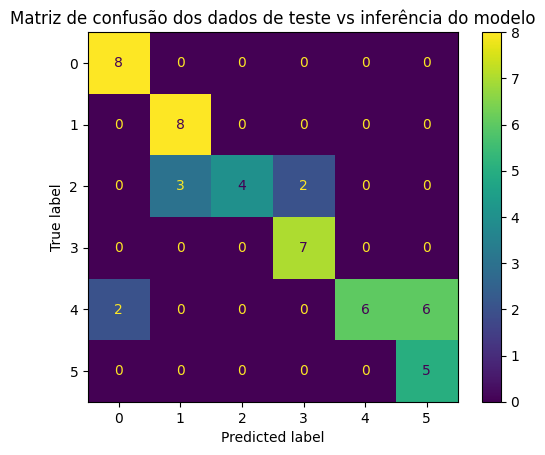

In [ ]:
# Plotando a matriz de confusão para o melhor k = n (k=2)

knn_best = KNeighborsClassifier(n_neighbors=2)

# Treinando o modelo
knn_best.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = knn_best.predict(X_test_scaled)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Gráfico de Matriz de confusão
plt.figure(figsize = (16,12))
classes = np.unique(y_test)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=classes)
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

#### Exiba as métricas do classification report.

* Precisão (Precision): Mede a proporção de previsões positivas corretas para cada classe.

* Revocação (Recall): Mede a proporção de verdadeiros positivos corretamente identificados.

* F1-Score: Média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre eles.

* Suporte (Support): O número de instâncias reais presentes em cada classe no conjunto de dados

* Accuracy: Mede a taxa de acerto geral do modelo.

* Weighted avg: Média ponderada que considera o número de instâncias de cada classe.

In [ ]:
# Testar múltiplos valores de n_neighbors
neighbors = range(1, 11)

for n in neighbors:
    # Instanciar o modelo K-NN
    knn = KNeighborsClassifier(n_neighbors=n)

    # Treinar o modelo
    knn.fit(X_train_scaled, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = knn.predict(X_test_scaled)

    # Exibir o classification report para cada valor de n_neighbors
    print(f"\nClassification Report for K = {n}")
    print(classification_report(y_test, y_pred, zero_division=0))  # zero_division=0 para evitar warnings


Classification Report for K = 1
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.89      1.00      0.94         8
           2       1.00      0.78      0.88         9
           3       0.88      1.00      0.93         7
           4       1.00      0.86      0.92        14
           5       0.83      1.00      0.91         5

    accuracy                           0.92        51
   macro avg       0.91      0.94      0.92        51
weighted avg       0.93      0.92      0.92        51


Classification Report for K = 2
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.89      1.00      0.94         8
           2       1.00      0.78      0.88         9
           3       0.88      1.00      0.93         7
           4       1.00      0.86      0.92        14
           5       0.83      1.00      0.91         5

    accurac

O valor de k=2 parece ser o mais adequado com base nas métricas:

* Accuracy: 0.92
* F1 (weighted avg): 0.92

Ele apresentou o maior *f1-score* ponderado, equilibrando bem *precision* e *recall* nas classes, sendo uma escolha segura para este conjunto de dados. Embora o k = 1 tenha obtido um desempenho idêntido, um número muito baixo de k pode levar a overfitting.

#### Otimizar o valor de K
- Ache o melhor valor de k para o algoritmo k-NN. Utilize o intervalo de 1 a 30.

Para encontrar o melhor valor de k para o algoritmo k-NN, podemos realizar um GridSearchCV ou fazer um loop que teste diferentes valores de k de 1 a 30 e avaliar o desempenho do modelo em cada um desses valores. Eu escolhi primeiro fazer um loop utilizando o cross_val_score (validação cruzada)

O código irá mostrar qual o melhor valor de k entre 1 e 30 com base no f1-score ponderado médio. O gráfico também facilitará a escolha visual do melhor k.

**scoring='f1_weighted':** Calcula o F1-score ponderado, que leva em conta o número de instâncias em cada classe, sendo ideal para problemas de classificação multiclasse com classes desbalanceadas.

Melhor valor de k: 1
Melhor Média de F1-score Ponderado: 0.8885


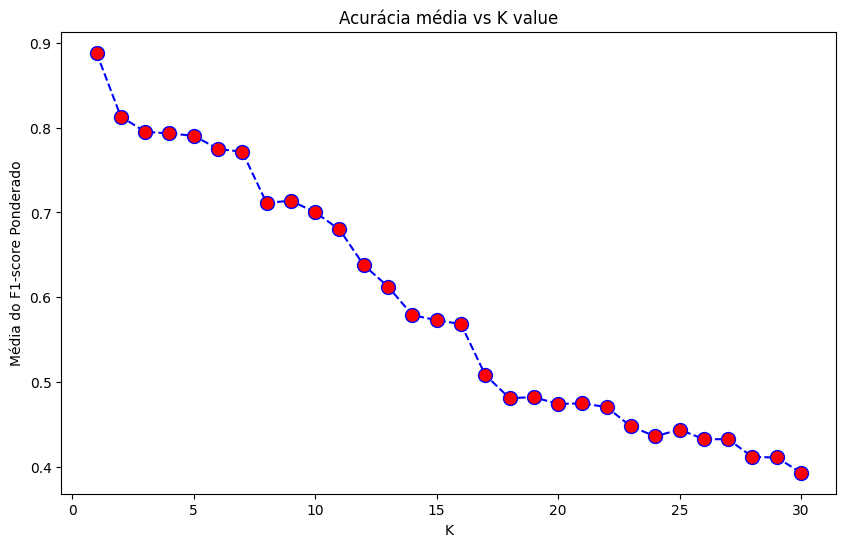

In [ ]:
# Intervalo de K para testar
k_range = range(1, 31)

# Lista para armazenar a média das acurácias para cada valor de k
mean_scores = []

# Loop para testar diferentes valores de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Validação cruzada com 5 folds
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_weighted')
    mean_scores.append(scores.mean())

# Exibir o melhor valor de k com a maior acurácia média
best_k = k_range[np.argmax(mean_scores)]
best_score = max(mean_scores)

print(f"Melhor valor de k: {best_k}")
print(f"Melhor Média de F1-score Ponderado: {best_score:.4f}")

# Gráfico de K vs Acurácia média
plt.figure(figsize=(10,6))
plt.plot(k_range, mean_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Acurácia média vs K value')
plt.xlabel('K')
plt.ylabel('Média do F1-score Ponderado')
plt.show()

#### Exiba a média dos resultados obtidos do experimento anterior

In [ ]:
# Exibir os resultados de cada fold
print(f"F1 weight scores para cada fold: {scores}")

# Exibir a média e o desvio padrão dos scores
print(f"Média do F1 weight: {scores.mean():.4f}")
print(f"Desvio padrão do F1 weight: {scores.std():.4f}")

F1 weight scores para cada fold: [0.446875   0.39880952 0.39047619 0.27555556 0.61142857 0.53666667
 0.32952381 0.32936508 0.27333333 0.33777778]
Média do F1 weight: 0.3930
Desvio padrão do F1 weight: 0.1051


#### Treine um modelo de k-NN com o melhor valor de k obtido
 e:

1. Plot a matriz de confusão
2. Exiba as métricas do Classification Report para o modelo k-NN


A validação cruzada classificou k=1 como o melhor valor de k. Porém, eu decidi usar o k=2 como o valor optimo de k, pela razão de k=1 ser um valor muito baixo, e portanto, mais propenso a overfitting. Enquanto que o k=2 possui resultados nas métricas idênticos ao do k=1 nos testes usando loop for mais acima.

In [ ]:
# # Plotando a matriz de confusão para o melhor k = n (k=2)

knn_best = KNeighborsClassifier(n_neighbors=2)

# Treinando o modelo
knn_best.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_knn = knn_best.predict(X_test_scaled)

<Figure size 1600x1200 with 0 Axes>

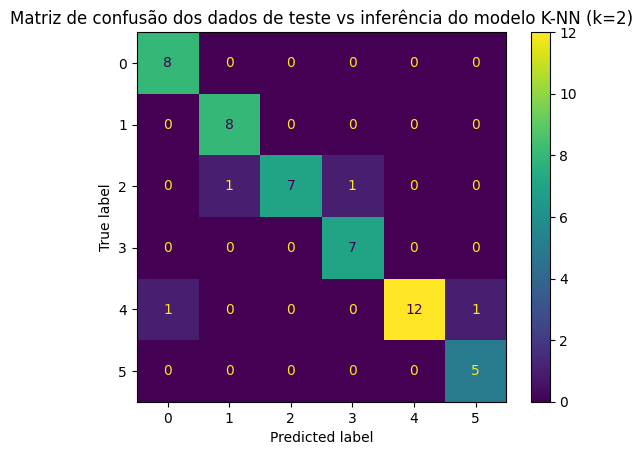

In [ ]:
# Matriz de confusão
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Gráfico de Matriz de confusão
plt.figure(figsize = (16,12))
classes = np.unique(y_test)
cmd_knn = ConfusionMatrixDisplay(cm_knn, display_labels=classes)
cmd_knn.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo K-NN (k=2)")
plt.show()

In [ ]:
# Exibir o classification report para o melhor modelo K-NN Classifier
print(f'\nClassification Report for K = 2')
print(classification_report(y_test, y_pred_knn))


Classification Report for K = 2
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.89      1.00      0.94         8
           2       1.00      0.78      0.88         9
           3       0.88      1.00      0.93         7
           4       1.00      0.86      0.92        14
           5       0.83      1.00      0.91         5

    accuracy                           0.92        51
   macro avg       0.91      0.94      0.92        51
weighted avg       0.93      0.92      0.92        51



###Random Forest

Instancie e treine a Random Forest com os parâmetros default do algoritmo. Durante o fim do treino calcule metricas que julgue que venham a agregar com o problema e justifique porque usou elas.

In [ ]:
# Instanciar o modelo RandomForest
rf = RandomForestClassifier(random_state=41)

# Treinar o modelo
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf.predict(X_test)

Exiba as métricas do Classification Report para o modelo Random Forest

In [ ]:
# Exibir o classification report para o modelo de RF
print(f'\nClassification Report for K = 2')
print(classification_report(y_test, y_pred_rf))


Classification Report for K = 2
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00         8
           2       1.00      0.89      0.94         9
           3       0.88      1.00      0.93         7
           4       1.00      0.86      0.92        14
           5       0.83      1.00      0.91         5

    accuracy                           0.94        51
   macro avg       0.93      0.96      0.94        51
weighted avg       0.95      0.94      0.94        51



Plote a matriz de confusão.

<Figure size 1600x1200 with 0 Axes>

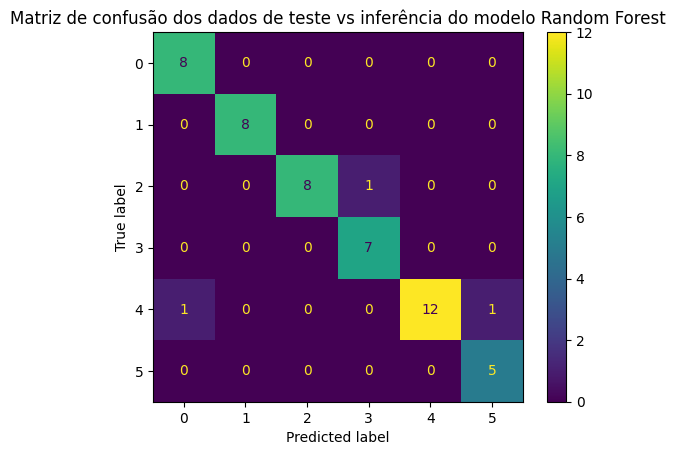

In [ ]:
# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Gráfico de Matriz de confusão
plt.figure(figsize = (16,12))
classes = np.unique(y_test)
cmd_rf = ConfusionMatrixDisplay(cm_rf, display_labels=classes)
cmd_rf.plot()
plt.title('Matriz de confusão dos dados de teste vs inferência do modelo Random Forest')
plt.show()

## Grid Search

Faça um grid search dos parâmetros da **Random Forest**:
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
4. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Links de referência:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
2. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
# Definir o grid de parâmetros para o Grid Search
param_dist = {
    'n_estimators': [100, 200, 300],  # generate 10 random values between 100 and 300.
    'max_features': ['sqrt', 'log2', None],  # número máximo de features para dividir um nó
    'max_depth': [10, 20, 30, None],  # profundidade máxima da árvore
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]  # amostragem com ou sem reposição
}

# Configuração do Randomized Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_dist,
                                   cv=5, verbose=2, n_jobs=-1, scoring='f1_weighted')

# Ajustar o RandomizedSearchCV ao conjunto de treino
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e o melhor score
print("Melhores parâmetros (Grid Search):", grid_search.best_params_)
print("Melhor score (Grid Search):", grid_search.best_score_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Melhores parâmetros (Grid Search): {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Melhor score (Grid Search): 0.9866016898274964


In [ ]:
# Melhores parâmetros (Grid Search): {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

In [ ]:
# Definir o grid de parâmetros para o Randomized Search
param_dist = {
    'n_estimators': randint(100, 200, 300),  # número de árvores
    'max_features': ['sqrt', 'log2', None],  # número máximo de features para dividir um nó
    'max_depth': [10, 20, None],  # profundidade máxima da árvore
    'min_samples_split': randint(2, 5),  # mínimo de amostras para dividir um nó
    'min_samples_leaf': randint(1, 5),  # mínimo de amostras em uma folha
    'bootstrap': [True, False]  # amostragem com ou sem reposição
}

# Configuração do Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=200, cv=5, verbose=2, n_jobs=-1, scoring='f1_weighted', random_state=41)

# Ajustar o RandomizedSearchCV ao conjunto de treino
random_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e o melhor score
print("Melhores parâmetros (Randomized Search):", random_search.best_params_)
print("Melhor score (Randomized Search):", random_search.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Melhores parâmetros (Randomized Search): {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 461}
Melhor score (Randomized Search): 0.9866016898274964


Exiba a média dos resultados obtidos do experimento anterior

In [ ]:
print("Melhor score (Randomized Search):", random_search.best_score_)

Melhor score (Randomized Search): 0.9866468060016448


In [ ]:
print("Melhor score (Grid Search):", grid_search.best_score_)

Melhor score (Grid Search): 0.9866016898274964


Após rodar várias vezes o RandomSearch a melhor configuração de parâmetros é a seguinte:

**Melhores parâmetros (Randomized Search):**

{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 259}

In [ ]:
# Avaliar no conjunto de teste RandomSearch
best_rf_random = RandomForestClassifier(n_estimators=259, bootstrap=True, max_depth=None, max_features='log2', min_samples_leaf=3, min_samples_split=2, random_state=41)
best_rf_random.fit(X_train, y_train)
test_score = best_rf_random.score(X_test, y_test)
print(f"Score no conjunto de teste (f1_weighted): {test_score:.4f}")

Score no conjunto de teste (f1_weighted): 0.9216


In [ ]:
# Avaliar no conjunto de teste GridSearch
bestgrid_rf = grid_search.best_estimator_
test_score = bestgrid_rf.score(X_test, y_test)
print(f"Score no conjunto de teste (f1_weighted): {test_score:.4f}")

Score no conjunto de teste (f1_weighted): 0.9412


Treine um modelo de Random Forest com os melhores valores dos parâmetros obtidos:

1. Exiba as métricas do Classification Report
2. Plot a matriz de confusão

In [ ]:
# Fazer previsões no conjunto de teste GridSearch
y_pred_rfGrid = bestgrid_rf.predict(X_test)

In [ ]:
# Fazer previsões no conjunto de teste RandomSearch
y_pred_rfRandom = best_rf.predict(X_test)

In [ ]:
# Exibir o classification report para o melhor modelo de RF (GridSearch)
print(f'\nClassification Report para o Melhor modelo RF')
print(classification_report(y_test, y_pred_rfGrid))


Classification Report para o Melhor modelo RF
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00         8
           2       1.00      0.89      0.94         9
           3       0.88      1.00      0.93         7
           4       1.00      0.86      0.92        14
           5       0.83      1.00      0.91         5

    accuracy                           0.94        51
   macro avg       0.93      0.96      0.94        51
weighted avg       0.95      0.94      0.94        51



In [ ]:
# Exibir o classification report para o melhor modelo de RF (RandomSearch)
print(f'\nClassification Report para o Melhor modelo RF')
print(classification_report(y_test, y_pred_rfRandom))


Classification Report para o Melhor modelo RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      0.89      0.94         9
           3       0.88      1.00      0.93         7
           4       1.00      0.79      0.88        14
           5       0.62      1.00      0.77         5

    accuracy                           0.92        51
   macro avg       0.92      0.95      0.92        51
weighted avg       0.95      0.92      0.92        51



<Figure size 1600x1200 with 0 Axes>

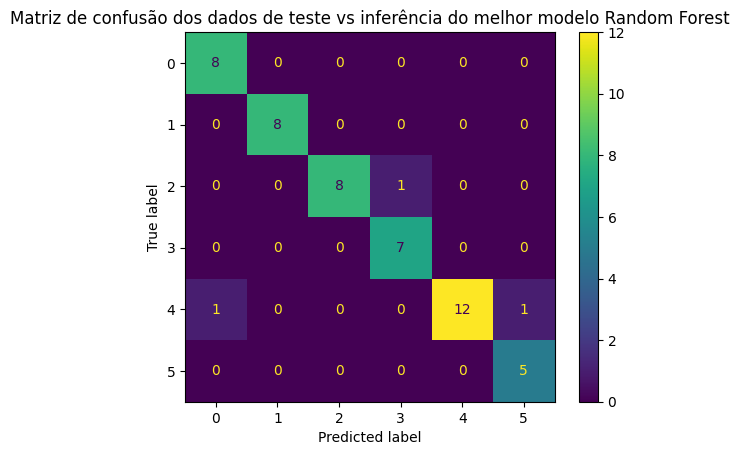

In [ ]:
# Matriz de confusão para o melhor modelo de RF (GridSearch)
cm_rfGrid = confusion_matrix(y_test, y_pred_rfGrid)

# Gráfico de Matriz de confusão
plt.figure(figsize = (16,12))
classes = np.unique(y_test)
cmd_rfGrid = ConfusionMatrixDisplay(cm_rfGrid, display_labels=classes)
cmd_rfGrid.plot()
plt.title('Matriz de confusão dos dados de teste vs inferência do melhor modelo Random Forest')
plt.show()

<Figure size 1600x1200 with 0 Axes>

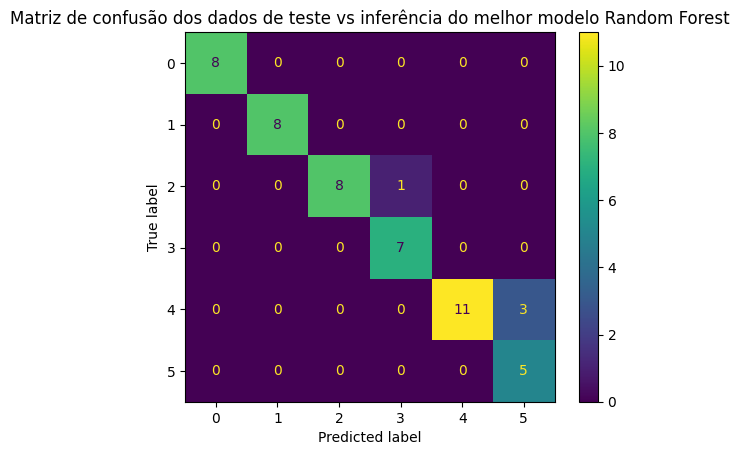

In [ ]:
# Matriz de confusão para o melhor modelo de RF (Random Search)
cm_rfRandom = confusion_matrix(y_test, y_pred_rfRandom)

# Gráfico de Matriz de confusão
plt.figure(figsize = (16,12))
classes = np.unique(y_test)
cmd_rfRandom = ConfusionMatrixDisplay(cm_rfRandom, display_labels=classes)
cmd_rfRandom.plot()
plt.title('Matriz de confusão dos dados de teste vs inferência do melhor modelo Random Forest')
plt.show()

## Conclusão

In [ ]:
# Função de avaliação de modelos
def evaluate(model, X_teste, y_teste):
    # Fazer as previsões
    predictions = model.predict(X_teste)

    # Calculando a taxa de erros
    errors = abs(predictions - y_teste)

    # Calcular o F1-Score (ponderado, para classificação multiclasse)
    f1 = f1_score(y_teste, predictions, average='weighted')

    print('Model Performance')
    print(f'Média de Erro: {np.mean(errors):0.4f}')
    print(f'F1-Score: {f1:0.4f}')

    return f1

In [ ]:
# Avaliando modelo padrão
base_model = rf
base_model.fit(X_train, y_train)
base_model_evaluation = evaluate(base_model, X_test, y_test)

Model Performance
Média de Erro: 0.1176
F1-Score: 0.9412


In [ ]:
# Avaliando modelo pelo GridSearch
grid_model_evaluation = evaluate(bestgrid_rf, X_test, y_test)

Model Performance
Média de Erro: 0.1176
F1-Score: 0.9412


In [ ]:
# Avaliando modelo pelo Random Search
random_model_evaluation = evaluate(best_rf_random, X_test, y_test)

Model Performance
Média de Erro: 0.0784
F1-Score: 0.9249


In [ ]:
# Avaliando modelo K-NN (k=2)
knn_model_evaluation = evaluate(knn_best, X_test_scaled, y_test)

Model Performance
Média de Erro: 0.1373
F1-Score: 0.9203


**Tabela Comparativa dos Modelos**


| Modelo                 | f1_weighted | Precisão | Recall | Erro | N° Árvores |
|------------------------|-------------|----------|--------|------|------------|
| KNN (k=2)              | 0.92        | 0.93     | 0.92   | 0.137 | N/A        |                  |
| Random Forest (Base)   | 0.93        | 0.92     | 0.92   | 0.117 | 100         |
| Random Forest (GridSearch)| 0.95   | 0.94     | 0.94   | 0.117 | 200   |   
| Random Forest (RandomSearch)   | 0.95        | 0.92     | 0.92 | 0.078 | 259  |

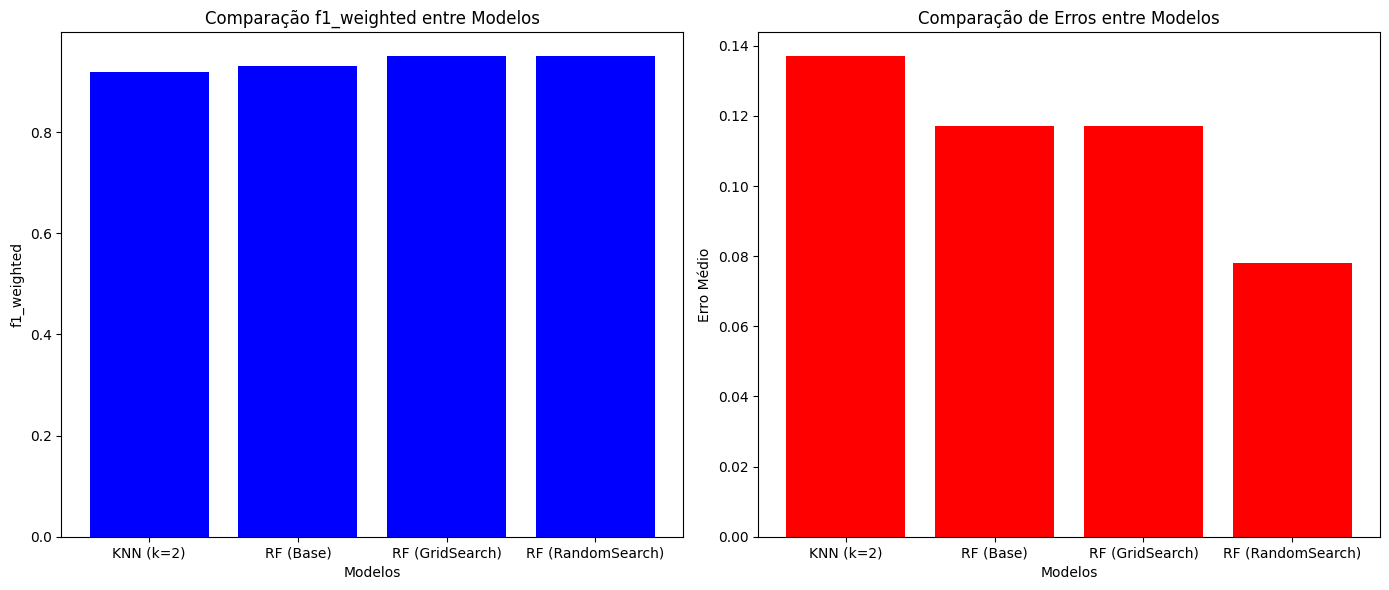

In [ ]:
# Modelos e métricas para plotagem
modelos = ['KNN (k=2)', 'RF (Base)', 'RF (GridSearch)', 'RF (RandomSearch)']
f1_weighted = [0.92, 0.93, 0.95, 0.95]
erros = [0.137, 0.117, 0.117, 0.078]
num_arvores = [None, 100, 200, 259]

# Criando os gráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: f1_weighted comparado entre modelos
axs[0].bar(modelos, f1_weighted, color='blue')
axs[0].set_title('Comparação f1_weighted entre Modelos')
axs[0].set_xlabel('Modelos')
axs[0].set_ylabel('f1_weighted')

# Gráfico 2: Comparação dos erros
axs[1].bar(modelos, erros, color='red')
axs[1].set_title('Comparação de Erros entre Modelos')
axs[1].set_xlabel('Modelos')
axs[1].set_ylabel('Erro Médio')

plt.tight_layout()
plt.show()

A escolha do K=2 após a validação cruzada mostrou-se adequada, uma vez que apresentou bons resultados de F1-score ponderado, além de evitar possíveis problemas de overfitting que poderiam surgir com K=1.

O uso do GridSearchCV e RandomizedSearchCV para otimização dos parâmetros da Random Forest foi apropriado, e o modelo final apresentou boas métricas de desempenho, especialmente ao usar SMOTE para balancear as classes. As matrizes de confusão e o classification report reforçaram que o modelo tem um bom desempenho em prever as classes corretamente.